In [75]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import random
import math
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot
from pathlib import Path
import requests
import pickle
import gzip
import torch
import math
import torch.nn.functional as F
from torch import nn
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from keras.datasets import mnist
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
import tensorflow as tf
import glob
covid = glob.glob('Dataset0.1/training/covid/*.*')
normal = glob.glob('Dataset0.1/training/normal/*.*')
pneumonia = glob.glob('Dataset0.1/training/pneumonia/*.*')
tuberculosis = glob.glob('Dataset0.1/training/tuberculosis/*.*')

data = []
labels = []

for i in covid:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in normal:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in pneumonia:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in tuberculosis:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(3)

data = np.array(data)
labels = np.array(labels)

In [77]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [78]:
x_test.shape

(720, 150, 150)

In [79]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, 
    test_size=0.25, random_state= 42)

In [80]:
x_valid.shape

(720, 150, 150)

In [81]:
image_size = x_train.shape[1]
input_size = image_size * image_size
print(input_size)

22500


In [82]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_valid = np.reshape(x_valid, [-1, input_size])
x_valid = x_valid.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [83]:
x_train.shape, y_train.shape , x_valid.shape, y_valid.shape, x_test.shape, y_test.shape

((2160, 22500), (2160,), (720, 22500), (720,), (720, 22500), (720,))

In [84]:
x_valid = torch.from_numpy(x_valid)

In [85]:
y_valid = torch.from_numpy(y_valid)

In [97]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test)

In [98]:
print(type(x_train))
print(type(x_valid))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [99]:
# Let's check how many of each tag are.
y_train_total=0
y_valid_total=0
y_test_total=0
total=0
for i in range(4):
    print(i,">> train:", sum(y_train==i), ", valid:", sum(y_valid==i), 
          ", test:", sum(y_test==i), ", total:", sum(y_train==i)+sum(y_valid==i)+sum(y_test==i) )
    y_train_total=y_train_total + sum(y_train==i)
    y_valid_total=y_valid_total + sum(y_valid==i)
    y_test_total=y_test_total + sum(y_test==i)
    total=total+sum(y_train==i)+sum(y_valid==i)+sum(y_test==i)
    
print("y_train_total=", y_train_total) 
print("y_valid_total=", y_valid_total) 
print("y_test_total=", y_test_total)
print("total=", total)

0 >> train: tensor(581) , valid: tensor(198) , test: tensor(221) , total: tensor(1000)
1 >> train: tensor(590) , valid: tensor(216) , test: tensor(194) , total: tensor(1000)
2 >> train: tensor(490) , valid: tensor(153) , test: tensor(157) , total: tensor(800)
3 >> train: tensor(499) , valid: tensor(153) , test: tensor(148) , total: tensor(800)
y_train_total= tensor(2160)
y_valid_total= tensor(720)
y_test_total= tensor(720)
total= tensor(3600)


In [100]:
class Net2nn(nn.Module):
    def __init__(self,n_features):
        super(Net2nn, self).__init__()
        self.fc1=nn.Linear(n_features,2048)
        self.fc2=nn.Linear(2048,512)
        self.fc3=nn.Linear(512,128)
        self.fc4=nn.Linear(128,32)
        self.fc5=nn.Linear(32,4)
        #self.fc6=nn.Linear(128,64)
        #self.fc7=nn.Linear(64,4)
        
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.relu(self.fc4(x))
        #x=F.relu(self.fc5(x))
        #x=F.relu(self.fc6(x))
        x=self.fc5(x)
        return x

In [101]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

torch.Size([2160, 22500]) torch.Size([2160])
torch.Size([720, 22500]) torch.Size([720])
torch.Size([720, 22500]) torch.Size([720])


In [102]:
centralized_model = Net2nn(x_train.shape[1])

In [103]:
centralized_model.eval()

Net2nn(
  (fc1): Linear(in_features=22500, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=4, bias=True)
)

In [104]:
centralized_optimizer = torch.optim.SGD(centralized_model.parameters(), lr=0.0005, momentum=0.9)
centralized_criterion = nn.CrossEntropyLoss()
#centralized_criterion = nn.BCEWithLogitsLoss

In [105]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [106]:
#x_train = torch.from_numpy(x_train).float()
#y_train = torch.squeeze(torch.from_numpy(y_train).float())
#x_test = torch.from_numpy(x_test).float()
#y_test = torch.squeeze(torch.from_numpy(y_test).float())
#x_valid = torch.from_numpy(x_valid).float()
#y_valid = torch.squeeze(torch.from_numpy(y_valid).float())

In [107]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [108]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)
x_valid = x_valid.to(device)
y_valid = y_valid.to(device)

centralized_model = centralized_model.to(device)
centralized_criterion = centralized_criterion.to(device)

In [109]:
def train(model, train_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0
    correct = 0

    for data, target in train_loader:
        output = model(data)
        loss = criterion(output, target.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        prediction = output.argmax(dim=1, keepdim=True)
        correct += prediction.eq(target.view_as(prediction)).sum().item()
        

    return train_loss / len(train_loader), correct/len(train_loader.dataset)

In [110]:
def validation(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            
            test_loss += criterion(output, target.long()).item()
            prediction = output.argmax(dim=1, keepdim=True)
            correct += prediction.eq(target.view_as(prediction)).sum().item()

    test_loss /= len(test_loader)
    correct /= len(test_loader.dataset)

    return (test_loss, correct)

In [111]:
batch_size = 32
numEpoch = 50

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=batch_size * 2)

test_ds = TensorDataset(x_test, y_test)
test_dl = DataLoader(test_ds, batch_size=batch_size * 2)

In [112]:
print("------ Centralized Model ------")
for epoch in range(numEpoch):
    central_train_loss, central_train_accuracy = train(centralized_model, train_dl, centralized_criterion, centralized_optimizer)
    central_test_loss, central_test_accuracy = validation(centralized_model, test_dl, centralized_criterion)
    
    print("epoch: {:3.0f}".format(epoch+1) + " | train accuracy: {:7.4f}".format(central_train_accuracy) + " | test accuracy: {:7.4f}".format(central_test_accuracy))

print("------ Training finished ------")

------ Centralized Model ------
epoch:   1 | train accuracy:  0.3319 | test accuracy:  0.3875
epoch:   2 | train accuracy:  0.3741 | test accuracy:  0.3833
epoch:   3 | train accuracy:  0.3745 | test accuracy:  0.3986
epoch:   4 | train accuracy:  0.3968 | test accuracy:  0.4472
epoch:   5 | train accuracy:  0.4421 | test accuracy:  0.5111
epoch:   6 | train accuracy:  0.4606 | test accuracy:  0.5167
epoch:   7 | train accuracy:  0.4907 | test accuracy:  0.5208
epoch:   8 | train accuracy:  0.5435 | test accuracy:  0.5972
epoch:   9 | train accuracy:  0.6162 | test accuracy:  0.6194
epoch:  10 | train accuracy:  0.6653 | test accuracy:  0.6583
epoch:  11 | train accuracy:  0.6736 | test accuracy:  0.6653
epoch:  12 | train accuracy:  0.6995 | test accuracy:  0.6472
epoch:  13 | train accuracy:  0.7185 | test accuracy:  0.7000
epoch:  14 | train accuracy:  0.7389 | test accuracy:  0.7181
epoch:  15 | train accuracy:  0.7481 | test accuracy:  0.7208
epoch:  16 | train accuracy:  0.7579 |

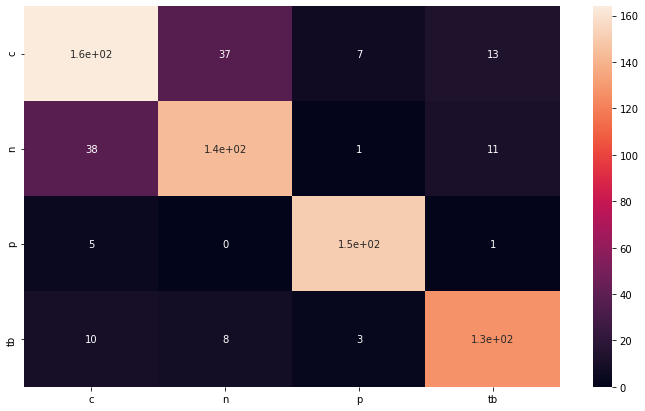

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_dl:
        output = centralized_model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('c', 'n', 'p', 'tb')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix)*720, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [132]:
# pytorch mlp for binary classification
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

In [135]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        
        #yhat = yhat.cpu().data.numpy().argmax()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [136]:
evaluate_model(test_dl, centralized_model)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.